In [3]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
sources = os.listdir("../raw_data/")
raw_data = pd.DataFrame()

for source in sources:
    df = pd.read_csv(f"../raw_data/{source}")
    raw_data = pd.concat([df, raw_data], ignore_index=True)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          968 non-null    object
 1   company_type   961 non-null    object
 2   company_size   916 non-null    object
 3   skills         854 non-null    object
 4   additional     968 non-null    object
 5   views_count    968 non-null    int64 
 6   english_level  252 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.1+ KB


In [6]:
# fix company type column
raw_data["company_type"] = raw_data["company_type"].str.replace(";", "")

# work with additional info

raw_data["additional"] = raw_data["additional"].str.replace(",", ".").str.lower().str.split(".")


In [7]:
# add fulltime/partime parameter

def work_schedule(lst: list) -> str:
    lst = [item.strip() for item in lst]
    if "повна зайнятість" in lst and "неповна зайнятість" in lst:
        return "has both options"
    elif "повна зайнятість" in lst:
        return "full-time"
    elif "неповна зайнятість" in lst:
        return "part-time"
    else:
        return "unknown"


raw_data["work_time"] = raw_data["additional"].apply(work_schedule)


In [8]:
def education_restriction(lst: list) -> str:
    lst = [item.strip() for item in lst]
    if "вища освіта" in lst:
        return "Higher Education"
    return "Not Necessary"

raw_data["Education"] = raw_data["additional"].map(education_restriction)

In [9]:
def group_by_tech(job_title: str) -> str:
    job_title = job_title.lower().strip().replace("-", " ")
    if ".net" in job_title:
        return ".net"
    if any(keyword in job_title for keyword in ["flutter", "android", "ios"]):
        return "mobile"
    if "node.js" in job_title:
        return "node.js"
    if any(keyword in job_title for keyword in ["javascript", "react", "js", "angular"]):
        return "javascript"
    if "java " in job_title:
        return "java"
    if "python" in job_title:
        return "python"
    if "front end" in job_title or "frontend" in job_title:
        return "frontend"
    if any(keyword in job_title for keyword in ["php", "laravel", "symfony"]):
        return "php"
    if "wordpress" in job_title:
        return "wordpress"
    if any(keyword in job_title for keyword in ["data", "аналітик", "analyst"]):
        return "data"
    if any(keyword in job_title for keyword in ["безпеки", "захисту", "security"]):
        return "cyber sec"
    if "unity" in job_title:
        return "unity"
    if "1с" in job_title or "1c" in job_title:
        return "1с"
    if "embedded" in job_title:
        return "embedded"
    if "back end" in job_title or "backend" in job_title:
        return "backend"
    if "fullstack" in job_title or "full stack" in job_title:
        return "fullstack"
    return job_title
    

raw_data["job_type"] = raw_data["title"].apply(group_by_tech)
    

In [10]:
size_mapping = {
    "менше 10 співробітників": "startup (10< employees)",
    "10–50 співробітників": "small (10 - 50 employees)",
    "50–250 співробітників": "medium-low (50 - 250 employees)",
    "250–1000 співробітників": "medium-high (250 - 1000 employees)",
    "більше 1000 співробітників": "big (<1000 employees)"
}

raw_data["company_size"] = raw_data["company_size"].map(size_mapping)


In [11]:
def english_level_coding(restriction: str | None) -> str:
    if restriction is np.NaN:
        return "no info"
    restriction = restriction.lower()
    if "англійська — початковий" in restriction:
        return "A2"
    if "aнглійська — середній" in restriction:
        return "B1"
    if "англійська — вище середнього" in restriction:
        return "B2"
    if "англійська — просунутий" in restriction:
        return "C1"
    if "англійська — вільно" in restriction:
        return "C2"
    return "no info"
    
    
raw_data.english_level = raw_data.english_level.map(english_level_coding)

In [12]:
raw_data

,title,company_type,company_size,skills,additional,views_count,english_level,work_time,Education,job_type
0,Програміст 1С,Роздрібна торгівля,big (<1000 employees),", MS Excel, MySQL, Користувач 1С, Програмуванн...","[повна зайнятість, досвід роботи від 1 року, ]",1,no info,full-time,Not Necessary,1с
1,Програміст 1C,"Будівельна промисловість, деревообробка",medium-high (250 - 1000 employees),", 1С УТП, Програмування, Програмування 1С, Нал...","[повна зайнятість, досвід роботи від 2 років,...",3,no info,full-time,Higher Education,1с
2,Програміст-десинатор в'язального обладнання,"Оптова торгівля, дистрибуція, імпорт, експорт",medium-high (250 - 1000 employees),", Комунікабельність, Відповідальність, Уважніс...","[повна зайнятість, досвід роботи від 2 років, ]",6,no info,full-time,Not Necessary,програміст десинатор в'язального обладнання
3,MS SQL Server database developer,IT,startup (10< employees),", SQL, MS SQL Server, Programming, Oracle SQL ...","[повна зайнятість, досвід роботи від 2 років, ]",2,no info,full-time,Not Necessary,data
4,Android-програміст,IT,small (10 - 50 employees),", Git, XML, JSON, Android SDK, Знання принципі...","[повна зайнятість, ]",2,no info,full-time,Not Necessary,mobile
...,...,...,...,...,...,...,...,...,...,...
963,Data Entry Operator,IT,startup (10< employees),", MS Excel, Користувач ПК, Відповідальність, Ш...","[повна зайнятість, досвід роботи від 1 року, ...",1,B2,full-time,Not Necessary,data
964,Менеджер з продажів (Бортничі),IT,medium-low (50 - 250 employees),", Впевненість, Активність, Продаж, Пошук нових...","[повна зайнятість, досвід роботи від 1 року, ]",1,no info,full-time,Not Necessary,менеджер з продажів (бортничі)
965,Головний спеціаліст-програміст відділу адмініс...,Державні організації,medium-high (250 - 1000 employees),", C++","[повна зайнятість, також готові взяти людину ...",1,no info,full-time,Higher Education,головний спеціаліст програміст відділу адмініс...
966,"Фахівець, фахівчиня з обробки інформації групи...","Неприбуткові, благодійні та громадські організ...",medium-high (250 - 1000 employees),", Цілеспрямованість, Уважність","[повна зайнятість, досвід роботи від 1 року, ...",1,no info,full-time,Not Necessary,"фахівець, фахівчиня з обробки інформації групи..."


In [13]:
import re


def required_experience(lst: list) -> int | str:
    for item in lst:
        expected_years = re.findall(r'\d+', item)
        if expected_years:
            return expected_years[0]
    return "no info"

raw_data["experience_years"] = raw_data.additional.apply(required_experience)

In [14]:
raw_data

,title,company_type,company_size,skills,additional,views_count,english_level,work_time,Education,job_type,experience_years
0,Програміст 1С,Роздрібна торгівля,big (<1000 employees),", MS Excel, MySQL, Користувач 1С, Програмуванн...","[повна зайнятість, досвід роботи від 1 року, ]",1,no info,full-time,Not Necessary,1с,1
1,Програміст 1C,"Будівельна промисловість, деревообробка",medium-high (250 - 1000 employees),", 1С УТП, Програмування, Програмування 1С, Нал...","[повна зайнятість, досвід роботи від 2 років,...",3,no info,full-time,Higher Education,1с,2
2,Програміст-десинатор в'язального обладнання,"Оптова торгівля, дистрибуція, імпорт, експорт",medium-high (250 - 1000 employees),", Комунікабельність, Відповідальність, Уважніс...","[повна зайнятість, досвід роботи від 2 років, ]",6,no info,full-time,Not Necessary,програміст десинатор в'язального обладнання,2
3,MS SQL Server database developer,IT,startup (10< employees),", SQL, MS SQL Server, Programming, Oracle SQL ...","[повна зайнятість, досвід роботи від 2 років, ]",2,no info,full-time,Not Necessary,data,2
4,Android-програміст,IT,small (10 - 50 employees),", Git, XML, JSON, Android SDK, Знання принципі...","[повна зайнятість, ]",2,no info,full-time,Not Necessary,mobile,no info
...,...,...,...,...,...,...,...,...,...,...,...
963,Data Entry Operator,IT,startup (10< employees),", MS Excel, Користувач ПК, Відповідальність, Ш...","[повна зайнятість, досвід роботи від 1 року, ...",1,B2,full-time,Not Necessary,data,1
964,Менеджер з продажів (Бортничі),IT,medium-low (50 - 250 employees),", Впевненість, Активність, Продаж, Пошук нових...","[повна зайнятість, досвід роботи від 1 року, ]",1,no info,full-time,Not Necessary,менеджер з продажів (бортничі),1
965,Головний спеціаліст-програміст відділу адмініс...,Державні організації,medium-high (250 - 1000 employees),", C++","[повна зайнятість, також готові взяти людину ...",1,no info,full-time,Higher Education,головний спеціаліст програміст відділу адмініс...,no info
966,"Фахівець, фахівчиня з обробки інформації групи...","Неприбуткові, благодійні та громадські організ...",medium-high (250 - 1000 employees),", Цілеспрямованість, Уважність","[повна зайнятість, досвід роботи від 1 року, ...",1,no info,full-time,Not Necessary,"фахівець, фахівчиня з обробки інформації групи...",1


In [15]:
raw_data.job_type.value_counts()

job_type
1с                                      130
data                                     86
php                                      74
javascript                               71
cyber sec                                67
                                       ... 
програміст delphi                         1
magento розробник                         1
розробник, верстальник сайтів на wix      1
junior webflow developer                  1
junior shopify developer                  1
Name: count, Length: 265, dtype: int64

In [16]:
top_job_types = raw_data['job_type'].value_counts().head(15).index.tolist()
jobs = ["data", "python", "backend", "fullstack"]
raw_data["is_pythonic"] = raw_data['job_type'].isin(jobs)


filtered_data = raw_data[raw_data['job_type'].isin(top_job_types)]
pythonic_jobs = raw_data[raw_data['is_pythonic'] == True]

raw_data

,title,company_type,company_size,skills,additional,views_count,english_level,work_time,Education,job_type,experience_years,is_pythonic
0,Програміст 1С,Роздрібна торгівля,big (<1000 employees),", MS Excel, MySQL, Користувач 1С, Програмуванн...","[повна зайнятість, досвід роботи від 1 року, ]",1,no info,full-time,Not Necessary,1с,1,False
1,Програміст 1C,"Будівельна промисловість, деревообробка",medium-high (250 - 1000 employees),", 1С УТП, Програмування, Програмування 1С, Нал...","[повна зайнятість, досвід роботи від 2 років,...",3,no info,full-time,Higher Education,1с,2,False
2,Програміст-десинатор в'язального обладнання,"Оптова торгівля, дистрибуція, імпорт, експорт",medium-high (250 - 1000 employees),", Комунікабельність, Відповідальність, Уважніс...","[повна зайнятість, досвід роботи від 2 років, ]",6,no info,full-time,Not Necessary,програміст десинатор в'язального обладнання,2,False
3,MS SQL Server database developer,IT,startup (10< employees),", SQL, MS SQL Server, Programming, Oracle SQL ...","[повна зайнятість, досвід роботи від 2 років, ]",2,no info,full-time,Not Necessary,data,2,True
4,Android-програміст,IT,small (10 - 50 employees),", Git, XML, JSON, Android SDK, Знання принципі...","[повна зайнятість, ]",2,no info,full-time,Not Necessary,mobile,no info,False
...,...,...,...,...,...,...,...,...,...,...,...,...
963,Data Entry Operator,IT,startup (10< employees),", MS Excel, Користувач ПК, Відповідальність, Ш...","[повна зайнятість, досвід роботи від 1 року, ...",1,B2,full-time,Not Necessary,data,1,True
964,Менеджер з продажів (Бортничі),IT,medium-low (50 - 250 employees),", Впевненість, Активність, Продаж, Пошук нових...","[повна зайнятість, досвід роботи від 1 року, ]",1,no info,full-time,Not Necessary,менеджер з продажів (бортничі),1,False
965,Головний спеціаліст-програміст відділу адмініс...,Державні організації,medium-high (250 - 1000 employees),", C++","[повна зайнятість, також готові взяти людину ...",1,no info,full-time,Higher Education,головний спеціаліст програміст відділу адмініс...,no info,False
966,"Фахівець, фахівчиня з обробки інформації групи...","Неприбуткові, благодійні та громадські організ...",medium-high (250 - 1000 employees),", Цілеспрямованість, Уважність","[повна зайнятість, досвід роботи від 1 року, ...",1,no info,full-time,Not Necessary,"фахівець, фахівчиня з обробки інформації групи...",1,False


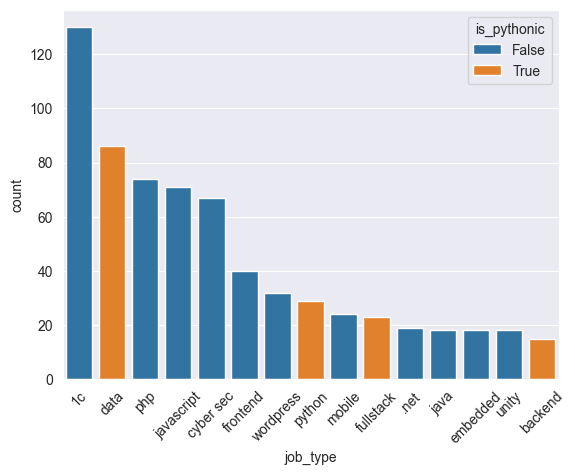

In [17]:
sns.countplot(
    x="job_type", 
    data=filtered_data, 
    order=top_job_types, 
    hue="is_pythonic"
)
plt.xticks(rotation=45)
plt.show()

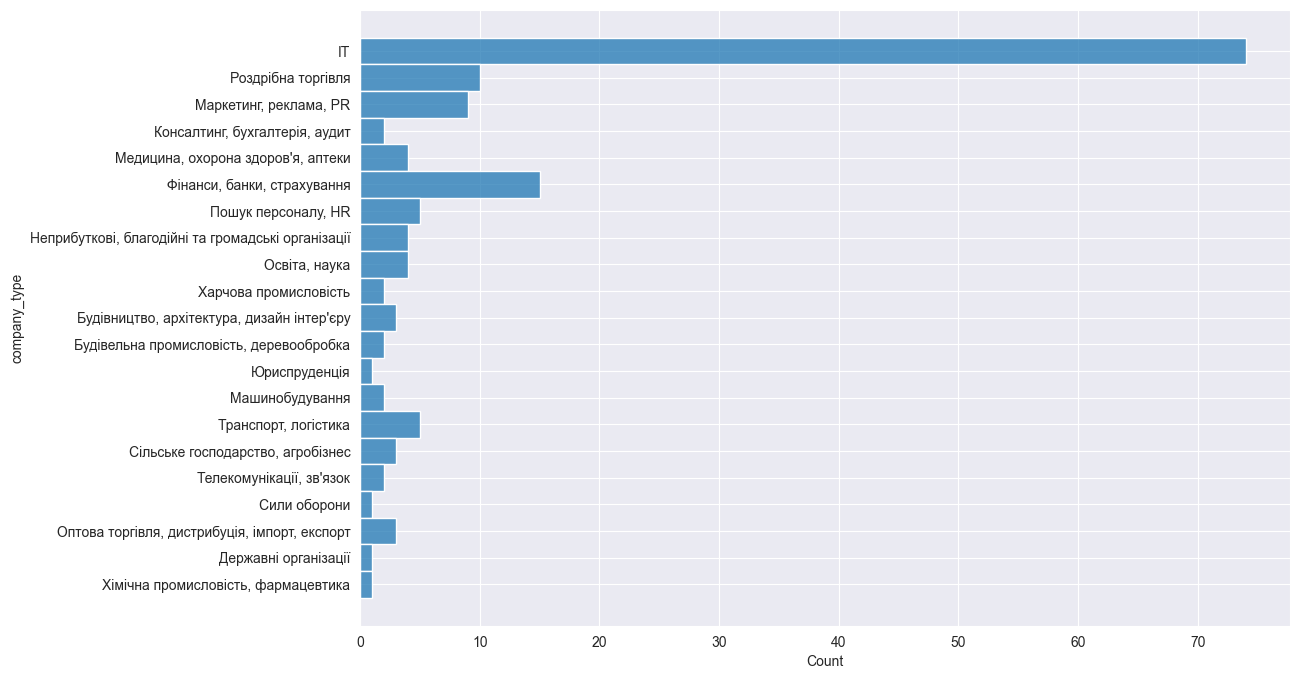

In [18]:
plt.figure(figsize=(12, 8 ))
sns.histplot(data=pythonic_jobs, y = "company_type")
plt.show()

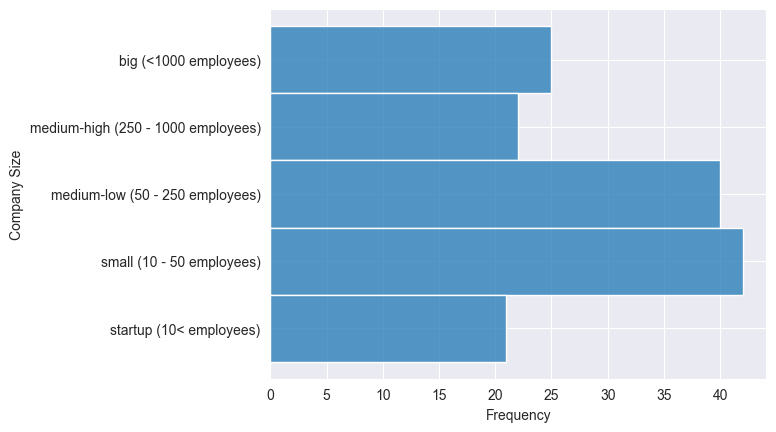

In [19]:
sorting = [
    "startup (10< employees)", 
    "small (10 - 50 employees)", 
    "medium-low (50 - 250 employees)", 
    "medium-high (250 - 1000 employees)", 
    "big (<1000 employees)"
]

pythonic_jobs.loc[:, "company_size"] = pd.Categorical(pythonic_jobs["company_size"], categories=sorting, ordered=True)

sns.histplot(data=pythonic_jobs.sort_values(by="company_size"), y="company_size")
plt.ylabel("Company Size")
plt.xlabel("Frequency")
plt.show()


In [20]:
pythonic_jobs.head()

,title,company_type,company_size,skills,additional,views_count,english_level,work_time,Education,job_type,experience_years,is_pythonic
3,MS SQL Server database developer,IT,startup (10< employees),", SQL, MS SQL Server, Programming, Oracle SQL ...","[повна зайнятість, досвід роботи від 2 років, ]",2,no info,full-time,Not Necessary,data,2,True
13,"Machine Learning, Python Developer",IT,medium-low (50 - 250 employees),", Python, Responsibility, Machine learning, De...","[повна зайнятість, також готові взяти студент...",2,no info,full-time,Higher Education,python,no info,True
17,"Back end розробник (С#, розробка GTA RP серверу)",IT,startup (10< employees),", MySQL, Git, C#, Знання принципів ООП, Стресо...","[повна зайнятість, також готові взяти студент...",3,no info,full-time,Not Necessary,backend,1,True
39,Intern Python developer,IT,medium-low (50 - 250 employees),", Git, Python, Комунікабельність, Програмуванн...","[повна зайнятість, також готові взяти студент...",2,C1,full-time,Not Necessary,python,no info,True
40,Back-end розробник,Роздрібна торгівля,medium-low (50 - 250 employees),", CSS, Користувач ОС Linux, JavaScript, HTML, ...","[повна зайнятість, досвід роботи від 2 років,...",1,no info,full-time,Higher Education,backend,2,True


In [21]:
pythonic_jobs.skills.value_counts()

skills
, Python, MongoDB, pandas                                                                                                                                                                                                                                                        2
, MS Excel, Відповідальність, Формування зведених таблиць, Робота з базою даних, Уважність, Акуратність, Ведення звітності, Створення макросів                                                                                                                                   2
, Самостійність                                                                                                                                                                                                                                                                  2
, MS Excel, SQL, MS Power BI, Маркетинг, Конкурентний аналіз, Аналіз даних                                                                                              

In [22]:
def skills_processing(skills_all: list) -> list:
    skills_processed = []
    for skill in skills_all:
        if skill:
            for s in str(skill).split(","):
                if s:
                    skills_processed.append(s.strip())
    return skills_processed


skills = skills_processing(pythonic_jobs.skills.to_list())


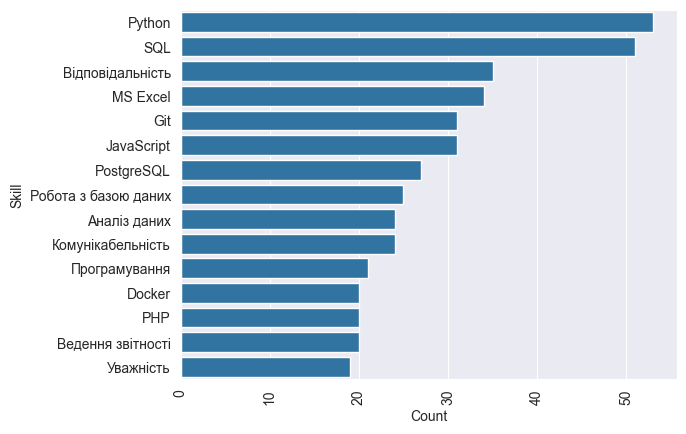

In [23]:
visualisation_skills = pd.Series(skills).value_counts()
top_15 = visualisation_skills.head(15)

df_top_15 = pd.DataFrame({'Skill': top_15.index, 'Count': top_15.values})

sns.barplot(y='Skill', x='Count', data=df_top_15)
plt.xticks(rotation=90)
plt.show()